# Advanced OpenCV

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook

In [3]:
output_notebook()

Loading BokehJS ...

In [28]:
# Helper Functions
def display(image):
    """
    This helper function helps to easily display image in the JN.
    Images laoded by OpenCV are in BGR and matplotlib expects RGB,
    that is why we convert from BGR to RGB.
    """
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    
# Function to Display video in the notebook
def display_vid(name):
    cap = cv.VideoCapture(name)

    ret, frame = cap.read()
    frame=cv.cvtColor(frame, cv.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
    frame=cv.flip(frame, -1) # because Bokeh flips vertically
    width=frame.shape[1] // 2 # decreasing display size
    height=frame.shape[0] // 2 # decreasing display size
    p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
    myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
    show(p, notebook_handle=True)
    while True:
        ret, frame = cap.read()
        if ret:
            frame=cv.cvtColor(frame, cv.COLOR_BGR2RGBA)
            frame=cv.flip(frame, -1)
            myImage.data_source.data['image']=[frame]
            push_notebook()
            time.sleep(0)
        else:
            break

## Color Spaces

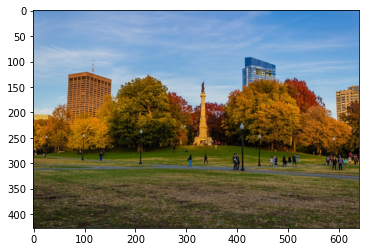

In [5]:
img = cv.imread('Data/Photos/park.jpg')
display(img)

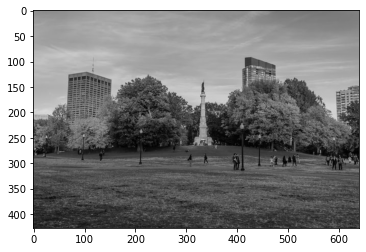

In [6]:
# BGR to Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
display(gray)

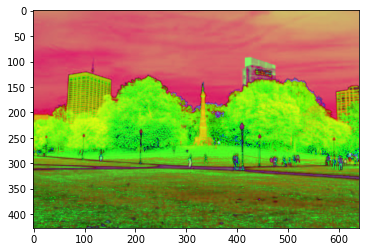

In [7]:
# BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
display(hsv)

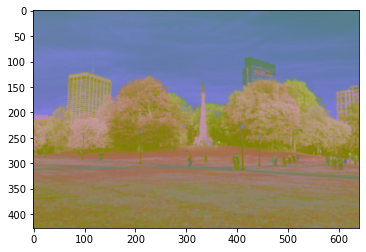

In [8]:
# BGR to L*a*b
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
display(lab)

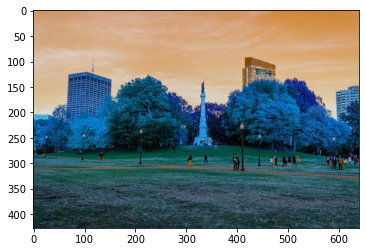

In [11]:
# BGR to RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
display(rgb) # My helper functions always convers from BGR to RGB, so keep that in mind. Here color channels are swapped

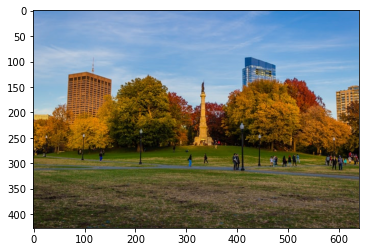

In [12]:
# LAB to BGR
lab_bgr = cv.cvtColor(lab, cv.COLOR_LAB2BGR)
display(lab_bgr)

## Color Channels
### Split/Merge

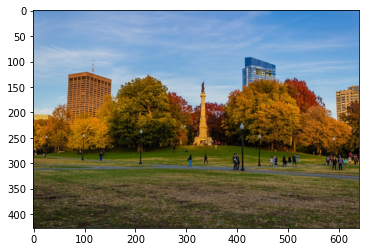

In [15]:
img = cv.imread('Data/Photos/park.jpg')
display(img)
# Blank Image
blank = np.zeros(img.shape[:2], dtype='uint8')

In [16]:
b,g,r = cv.split(img)

blue = cv.merge([b,blank,blank])
green = cv.merge([blank,g,blank])
red = cv.merge([blank,blank,r])

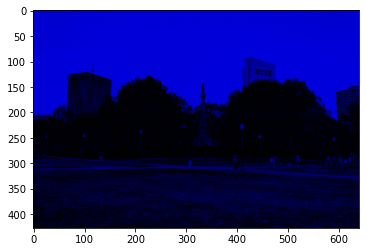

In [17]:
display(blue)

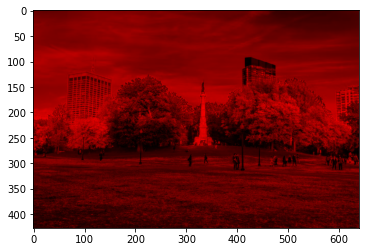

In [18]:
display(red)

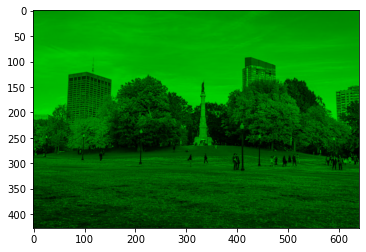

In [19]:
display(green)

In [20]:
print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

(427, 640, 3)
(427, 640)
(427, 640)
(427, 640)


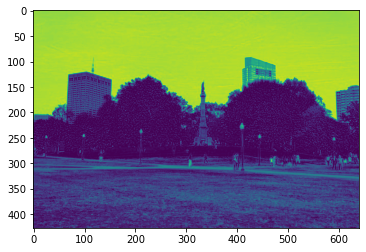

In [26]:
plt.imshow(b)

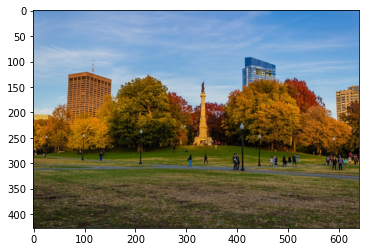

In [27]:
merged = cv.merge([b,g,r])
display(merged)

## Blurring

#### 1. Averaging
This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. This is done by the function cv.blur() or cv.boxFilter(). Check the docs for more details about the kernel. We should specify the width and height of the kernel. A 3x3 normalized box filter would look like the below:

K=1/19 * np.ones((3,3))

Note:
If you don't want to use a normalized box filter, use cv.boxFilter(). Pass an argument normalize=False to the function.

#### 2. Gaussian Blurring
In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, cv.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

If you want, you can create a Gaussian kernel with the function, cv.getGaussianKernel().

#### 3. Median Blurring
Here, the function cv.medianBlur() takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

#### 4. Bilateral Filtering
cv.bilateralFilter() is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.


https://docs.opencv.org/4.5.2/d4/d13/tutorial_py_filtering.html

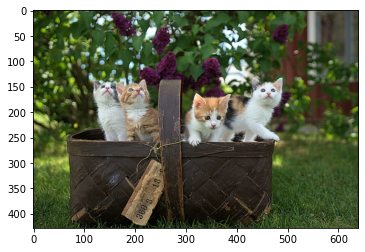

In [30]:
img = cv.imread('Data/Photos/cats.jpg')
display(img)

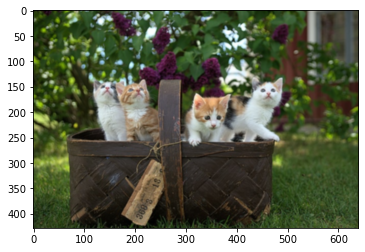

In [35]:
# Averaging
average = cv.blur(img, (3,3))
display(average)

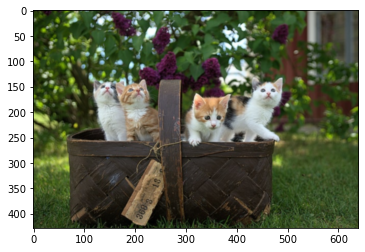

In [36]:
# Gaussian Blur
gauss = cv.GaussianBlur(img, (3,3), 0)
display(gauss)

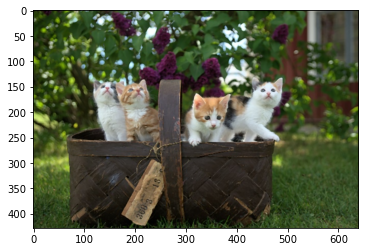

In [37]:
# Median Blur
median = cv.medianBlur(img, 3)
display(median)

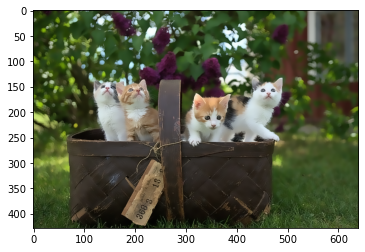

In [44]:
# Bilateral
bilateral = cv.bilateralFilter(img, 10, 50, 50)
display(bilateral)

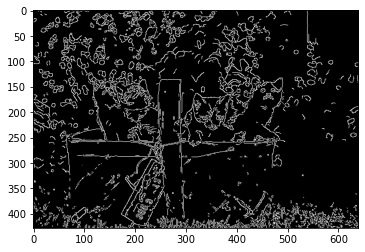

In [45]:
# Edge detection from Bilateral Filtering
canny = cv.Canny(bilateral, 125, 175)
display(canny)

## Bitwise Operations

In [47]:
blank = np.zeros((400,400), dtype='uint8')
rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
circle = cv.circle(blank.copy(), (200,200), 200, 255, -1)

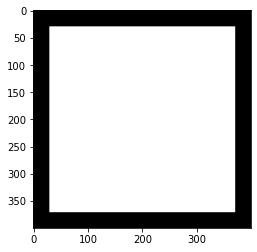

In [48]:
display(rectangle)

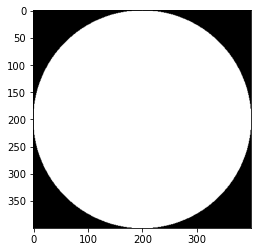

In [49]:
display(circle)

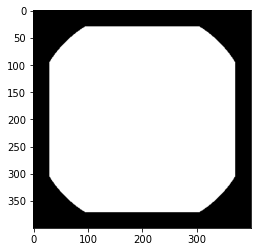

In [50]:
# bitwise AND --> intersecting regions
bitwise_and = cv.bitwise_and(rectangle, circle)
display(bitwise_and)

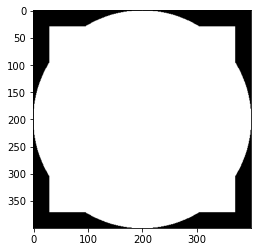

In [51]:
# bitwise OR --> non-intersecting and intersecting regions
bitwise_or = cv.bitwise_or(rectangle, circle)
display(bitwise_or)

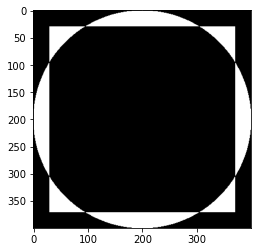

In [52]:
# bitwise XOR --> non-intersecting regions
bitwise_xor = cv.bitwise_xor(rectangle, circle)
display(bitwise_xor)

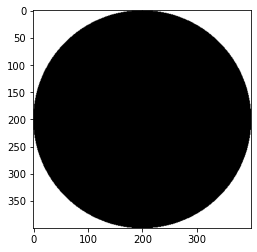

In [58]:
# bitwise NOT --> Inverts the bonary color
bitwise_not = cv.bitwise_not(circle)
display(bitwise_not)

## Masking

Put simply; a mask allows us to focus only on the portions of the image that interests us.

For example, let’s say that we were building a computer vision system to recognize faces. The only part of the image we are interested in finding and describing is the parts of the image that contain faces — we simply don’t care about the rest of the image’s content. Provided that we could find the faces in the image, we may construct a mask to show only the faces in the image.

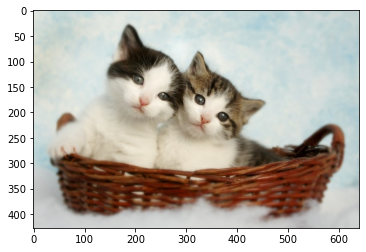

In [62]:
img = cv.imread('Data/Photos/cats 2.jpg')
display(img)
blank = np.zeros(img.shape[:2], dtype='uint8')

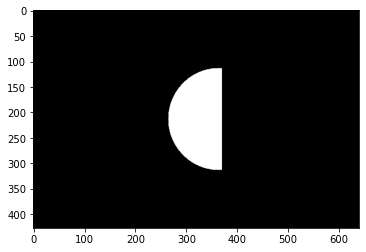

In [63]:
circle = cv.circle(blank.copy(), (img.shape[1]//2 + 45,img.shape[0]//2), 100, 255, -1)

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)

weird_shape = cv.bitwise_and(circle,rectangle)

display(weird_shape)

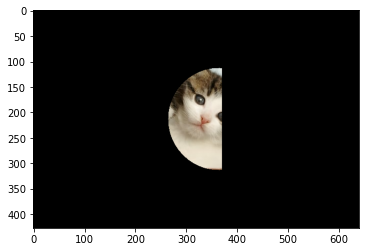

In [66]:
masked = cv.bitwise_and(img,img,mask=weird_shape)
display(masked)

## Histogram Computation

https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html

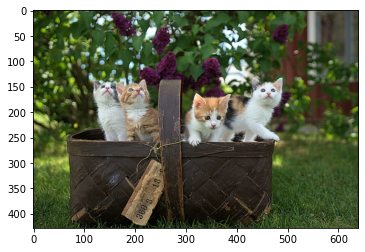

In [67]:
img = cv.imread('Data/Photos/cats.jpg')
display(img)
blank = np.zeros(img.shape[:2], dtype='uint8')

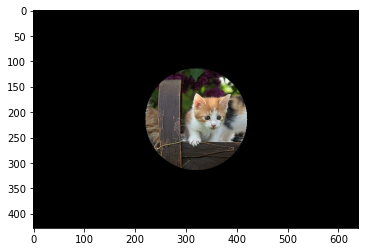

In [74]:
mask = cv.circle(blank, (img.shape[1]//2,img.shape[0]//2), 100, 255, -1)

masked = cv.bitwise_and(img,img,mask=mask)
display(masked)

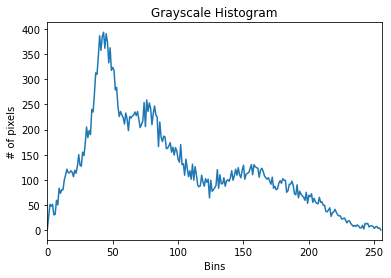

In [77]:
# GRayscale histogram
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_hist = cv.calcHist([gray], [0], mask, [256], [0,256] )

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

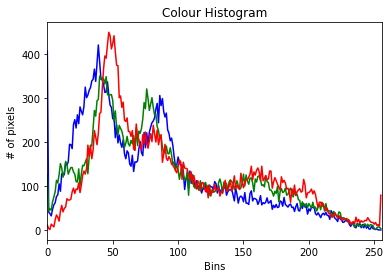

In [76]:
# Colour Histogram

plt.figure()
plt.title('Colour Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
colors = ('b', 'g', 'r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img], [i], mask, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])